,year,population,dP
0,1790.0,3.9,NaN
1,1800.0,5.3,1.4
2,1810.0,7.2,1.9
3,1820.0,9.6,2.4
4,1830.0,12.9,3.3
5,1840.0,17.1,4.2
6,1850.0,23.2,6.1
7,1860.0,31.4,8.2
8,1870.0,38.6,7.2
9,1880.0,50.2,11.6


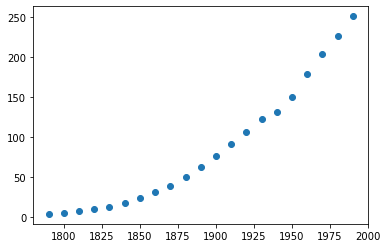

In [42]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt 
from scipy.optimize import curve_fit

import pandas as pd
dataset = pd.DataFrame(pd.read_csv('data.csv'),dtype=float)
data = dataset.iloc[:14]

plt.scatter(dataset.year,dataset.population)
data['dP'] = data.population.diff()
data

In [44]:
P = data.population.iloc[:-1]
dP = data.dP.iloc[1:]
P0 = P.iloc[0]

def loss(pred,real):
    return np.abs(pred-real)/real

def percentage(x):
    return "%.2f%%" % (x * 100)

def fit_display(f):
    popt,_ = curve_fit(f,P,dP)
    print('parameters:',popt)

    pred = [P0]
    for _ in P:
        pred.append(pred[-1]+f(pred[-1],*popt))

    result = data.copy()
    result['prediction'] = np.round(pred,2)
    loss_ = loss(pred,data.population)
    result['loss'] = np.asarray(list(map(percentage,loss_)))
    print('loss:',percentage(np.mean(loss_)))
    
    plt.scatter(data.year,data.population)
    plt.plot(data.year,pred,'r-')
    return result


parameters: [0.20915808]
loss: 41.45%


,year,population,dP,prediction,loss
0,1790.0,3.9,NaN,3.90,0.00%
1,1800.0,5.3,1.4,4.72,11.02%
2,1810.0,7.2,1.9,5.70,20.80%
3,1820.0,9.6,2.4,6.89,28.18%
4,1830.0,12.9,3.3,8.34,35.37%
5,1840.0,17.1,4.2,10.08,41.05%
6,1850.0,23.2,6.1,12.19,47.46%
7,1860.0,31.4,8.2,14.74,53.06%
8,1870.0,38.6,7.2,17.82,53.83%
9,1880.0,50.2,11.6,21.55,57.08%


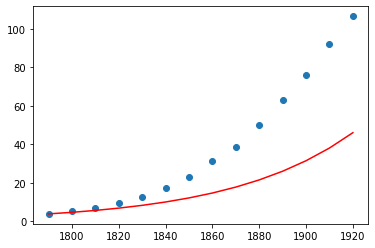

In [45]:
def f1(P,r):
    return r*P

fit_display(f1)

parameters: [  0.36058857 166.31668208]
loss: 1.33%


,year,population,dP,prediction,loss
0,1790.0,3.9,NaN,3.90,0.00%
1,1800.0,5.3,1.4,5.27,0.50%
2,1810.0,7.2,1.9,7.11,1.19%
3,1820.0,9.6,2.4,9.57,0.31%
4,1830.0,12.9,3.3,12.82,0.60%
5,1840.0,17.1,4.2,17.09,0.06%
6,1850.0,23.2,6.1,22.62,2.50%
7,1860.0,31.4,8.2,29.67,5.52%
8,1870.0,38.6,7.2,38.45,0.38%
9,1880.0,50.2,11.6,49.12,2.16%


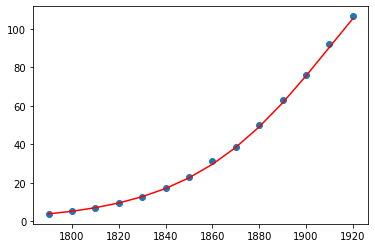

In [46]:
def f2(P,r,K):
    return r*(1-P/K)*P

fit_display(f2)